In [307]:
# Import Pandas 
import pandas as pd
from matplotlib import pyplot
#import split model
from sklearn.model_selection import train_test_split

#import Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

# import cross_val_score
from sklearn.model_selection import cross_val_score
# Load dataset
data = pd.read_csv('all_training.csv', low_memory=False,encoding='utf-8')
# drops rows having at least 1 missing value
#data.dropna()
# drops ID rows 
data.drop('ID', axis='columns', inplace=True)




In [308]:

dataset = data.dropna()
# class distribution
dataset.groupby('target').size()
print(dataset.groupby('target').size())
dataset.head()



target
0    131
1    190
dtype: int64


,Sex,Age,CA,CK,CREA,ALP,GGT,GLU,AST,ALT,...,MO,EO,BA,NET,LYT,MOT,EOT,BAT,Suspect,target
3,0,82.0,2.27,138.0,0.755000,123.5,176.5,106.000000,114.0,63.0,...,9.50,1.70,0.90,3.60,2.6,0.70,0.10,0.1,0.5,0
4,1,79.0,2.07,73.0,1.810000,62.0,36.5,96.000000,28.0,38.5,...,10.00,8.50,0.50,0.40,0.5,0.10,0.10,0.0,1.0,0
5,1,84.0,2.06,115.0,1.283333,75.0,75.0,95.500000,40.5,27.0,...,6.80,1.10,0.60,2.80,0.6,0.25,0.05,0.0,0.0,1
12,0,53.0,2.36,45.5,0.593333,62.0,21.5,91.666667,36.0,35.5,...,10.65,0.90,0.40,3.95,1.4,0.60,0.05,0.0,1.0,0
13,0,76.0,2.20,349.0,2.420000,159.5,147.0,640.000000,1018.5,559.5,...,7.25,0.05,0.05,15.85,0.2,1.25,0.00,0.0,0.5,1


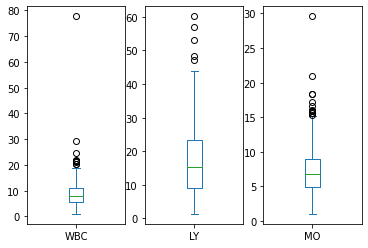

dataset shape (321, 35)


In [309]:
# LY  = Lymphocytes count (%)
# WBC = White blood cells
# MO = Monocytes count (%)

# Drow box plots (Univariate)
dataset.plot(kind='box', x='target', y=["WBC", "LY", "MO"],subplots=True,sharex=False, sharey=False)
pyplot.show()
print("dataset shape",dataset.shape)

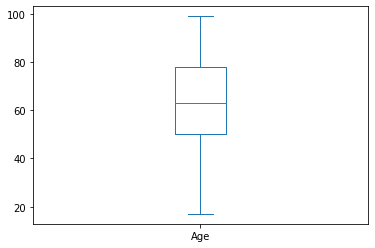

dataset shape (321, 35)


In [310]:
# Drow box plots (Univariate)
dataset.plot(kind='box', x='target', y=['Age'],subplots=True,sharex=False, sharey=False)
pyplot.show()
print("dataset shape",dataset.shape)


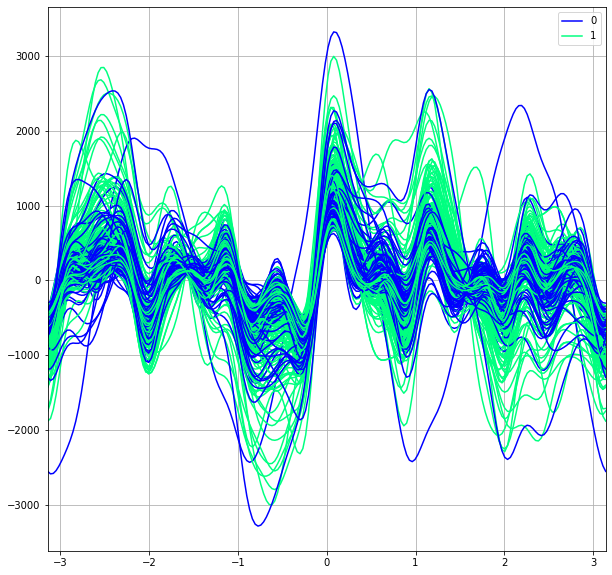

In [311]:
# Drow Andrews curves charts

from pandas.plotting import andrews_curves
pyplot.figure(figsize=(10, 10));

andrews_curves(dataset, "target", colormap="winter");


In [312]:
from sklearn.preprocessing import StandardScaler

#Split-out validation dataset
array = dataset.values
X = array[:,0:34]
print('X:',X.shape)

#print(X.view())
y = array[:,34]
print('Y:',y.shape)
#print(y.view())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
#print (y)


print('X_train:',     X_train.shape)
print('X_validation',  X_test.shape)
print('Y_train',      y_train.shape)
print('Y_validation', y_test.shape)

print('X:',X.shape)
print('Y:',y.shape)




X: (321, 34)
Y: (321,)
X_train: (256, 34)
X_validation (65, 34)
Y_train (256,)
Y_validation (65,)
X: (321, 34)
Y: (321,)


In [313]:

models = []
LR   = LogisticRegression(solver = 'liblinear', multi_class='ovr')
LDA  = LinearDiscriminantAnalysis()
KNN  = KNeighborsClassifier()
CART = DecisionTreeClassifier()
NB   = GaussianNB()
SVM  = SVC(gamma='auto')
# evaluate each model in turn
results = []
names   = ['LR','LDA','KNN','CART','NB','SVM']

print('algo    mean       std   ')


#k-fold cross-validation
#This will split our dataset into 10 parts, train on 9 and test on 1 
#and repeat for all combinations of train-test splits.

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

#LogisticRegression(LR)
cv_results = cross_val_score(LR, X_train, y_train , cv=kfold,n_jobs=1)
results.append(cv_results)
print('%s:   %f    (%f)' % ('LR', cv_results.mean(), cv_results.std()))

#Linear Discriminant Analysis (LDA)
cv_results = cross_val_score(LDA, X_train, y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
print('%s:   %f    (%f)' % ('LDA', cv_results.mean(), cv_results.std()))

#K-Nearest Neighbors (KNN)
cv_results = cross_val_score(KNN, X_train, y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
print('%s:   %f    (%f)' % ('KNN', cv_results.mean(), cv_results.std()))

#Classification and Regression Trees (CART)
cv_results = cross_val_score(CART, X_train, y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
print('%s:   %f    (%f)' % ('CART', cv_results.mean(), cv_results.std()))

#Gaussian Naive Bayes (NB)
cv_results = cross_val_score(NB, X_train, y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
print('%s:   %f    (%f)' % ('NB', cv_results.mean(), cv_results.std()))

#Support Vector Machines (SVM)
cv_results = cross_val_score(SVM, X_train, y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
print('%s:   %f    (%f)' % ('SVM', cv_results.mean(), cv_results.std()))



algo    mean       std   
LR:   0.824462    (0.081942)
LDA:   0.793231    (0.081184)
KNN:   0.703385    (0.093969)
CART:   0.687385    (0.119168)
NB:   0.750462    (0.047637)
SVM:   0.578154    (0.012739)


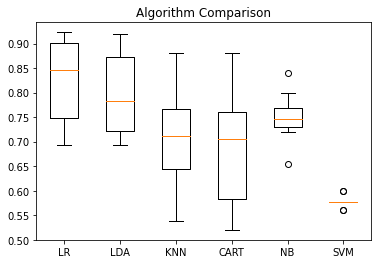

In [314]:

#Compare Algorithms 
pyplot.boxplot(results, labels=names) 
pyplot.title('Algorithm Comparison') 
pyplot.show()

In [315]:

# Make predictions on validation dataset
model = LogisticRegression(solver = 'liblinear', multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [316]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Evaluate predictions
print('accuracy_score',accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

accuracy_score 0.8461538461538461
[[18  5]
 [ 5 37]]
              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78        23
         1.0       0.88      0.88      0.88        42

    accuracy                           0.85        65
   macro avg       0.83      0.83      0.83        65
weighted avg       0.85      0.85      0.85        65



In [317]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8307692307692308
[[18  5]
 [ 6 36]]
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.77        23
         1.0       0.88      0.86      0.87        42

    accuracy                           0.83        65
   macro avg       0.81      0.82      0.82        65
weighted avg       0.83      0.83      0.83        65

